In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn import datasets

x, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [3]:
from sklearn.model_selection import train_test_split

n = 80
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

<Axes: >

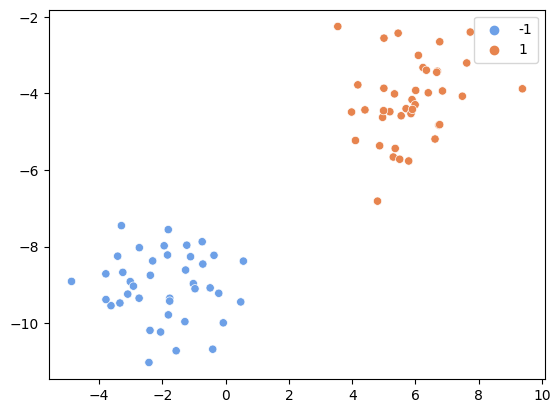

In [4]:
#cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette=cmap)

In [5]:
def gradient_descent(x, y, w, b, N, C, lr, iterations=500):
    plt_loss = []
    _, features = x.shape
    w = np.zeros(features)

    for _ in range(iterations):
        fx = np.dot(x, w) - b
        margins = 1 - np.dot(y, fx)

        loss = np.sum(np.maximum(0, margins)) / N + C * np.dot(w, w)
        plt_loss.append(loss)

        for i, val in enumerate(x):
            condition = y[i] * (np.dot(val, w) - b) >= 1
            if condition:
                w -= lr * (2 * C * w)
            else:
                w -= lr * (2 * C * w - np.dot(val, y[i]))
                b -= lr * y[i]
    
    return w, b, plt_loss

In [6]:
print(sns.color_palette("crest").as_hex())

['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']


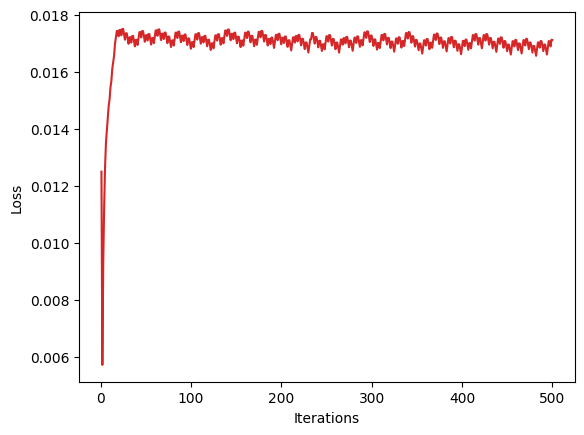

In [7]:
optimums = [[1e-3, "#d62728"]]
plt.xlabel("Iterations"), plt.ylabel("Loss")
for item in optimums:
    w, b, plt_mse = gradient_descent(x_train, y_train, 0, 0, n, 0.1, item[0])
    iters = np.arange(1, len(plt_mse)+1)
    sns.lineplot(x=iters, y=plt_mse, color=item[1])

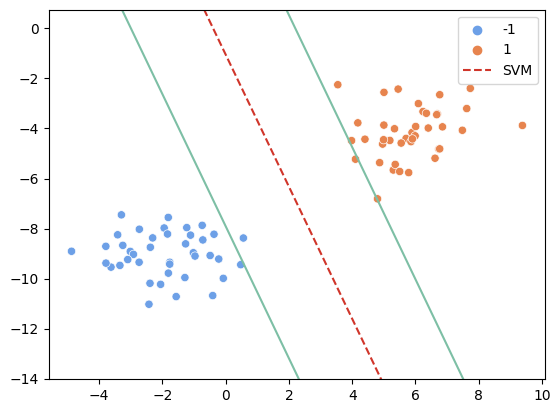

In [12]:
def get_hyperplane_value(X, w, b, offset):
        return (-w[0] * X + b + offset) / w[1]

x, y = x_train, y_train
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette=cmap)

x0_1 = np.amin(x[:, 0])
x0_2 = np.amax(x[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

sns.lineplot(x=[x0_1, x0_2], y=[x1_1, x1_2], color = "#d0352a", linestyle="dashed", label="SVM")
sns.lineplot(x=[x0_1, x0_2], y=[x1_1_m, x1_2_m], color="#7dbfa5")
sns.lineplot(x=[x0_1, x0_2], y=[x1_1_p, x1_2_p], color="#7dbfa5")

x1_min = np.amin(x[:, 1])
x1_max = np.amax(x[:, 1])
plt.ylim([x1_min - 3, x1_max + 3])

plt.show()
